#### Python version: 3.9.1

#### Jupyter notebook version: 6.2.0

#### Networkx version: 2.5

#### Files used: Provided by instructors, programming_task_dataset.csv
##### - Please put the files under sharing the same directory with this notebook-

#### Student Name: POON Sze Sen

#### Student Number: 3035752729


## Import Libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import nltk
from nltk.corpus import stopwords
from string import punctuation
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def tokenize(text):
    
    # data preprocessing and cleaning
    
    text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text = re.sub(r'#', '', text) #remove hashtag symbol
    text = re.sub(r'RT[\s]+', '', text) #remove Retweet symbol
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlinks
    
    # tokenize data
    
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [word for word in tokens if word not in punctuation]
    tokens = " ".join(tokens)
    
    return tokens

In [3]:
def text_polarity(text):
    return TextBlob(text).sentiment.polarity

In [4]:
def text_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

### For sentiment,
1. polarity less than 0 is classified as negative
2. polarity equals to 0 is classified as neutral
3. polarity larger than 0 is classified as positive

In [5]:
def sentiment(polarity):
    if polarity < 0:
        return "negative"
    elif polarity == 0:
        return "neutral"
    else:
        return "positive"

In [6]:
tweets = pd.read_csv("programming_task_dataset.csv")

## Question 1 - Polarity and Subjectivity

In [7]:
tweets['tokenized text'] = tweets['text'].apply(tokenize)

In [8]:
tweets['polarity'] = tweets['tokenized text'].apply(text_polarity)

In [9]:
tweets['subjectivity'] = tweets['tokenized text'].apply(text_subjectivity)

In [10]:
tweets.head(10)

,textID,text,tokenized text,polarity,subjectivity
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,Last session day,0.000000,0.066667
1,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai also really exciting precisely -- sky...,0.466667,0.733333
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",Recession hit Veronique Branquinho quit compan...,0.000000,0.000000
3,01082688c6,happy bday!,happy bday,0.800000,1.000000
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,I like,0.000000,0.000000
5,726e501993,that`s great!! weee!! visitors!,great weee visitors,0.800000,0.750000
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,I THINK EVERYONE HATES ME ON HERE lol,0.800000,0.700000
7,afa11da83f,"soooooo wish i could, but im in school and my...",soooooo wish could im school myspace completel...,0.100000,0.400000
8,e64208b4ef,and within a short time of the last clue all ...,within short time last clue,0.000000,0.183333
9,37bcad24ca,What did you get? My day is alright.. haven`...,What get My day alright .. done anything yet l...,0.000000,0.000000


## Question 2 - Proportion of sentiment

In [11]:
tweets["sentiment"] = tweets["polarity"].apply(sentiment)

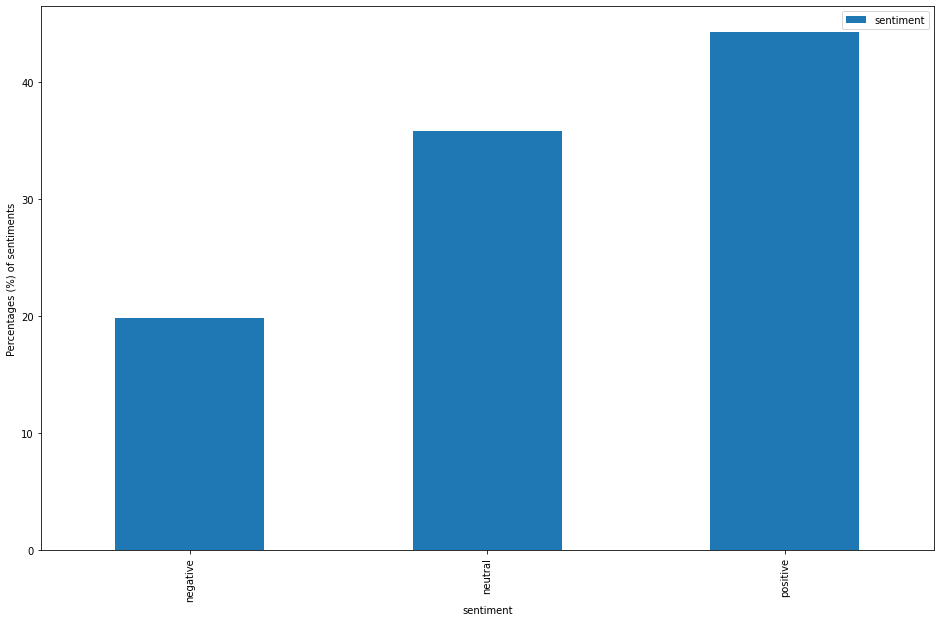

In [12]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,10))

ax.set_ylabel("Percentages (%) of sentiments")

tweets.groupby("sentiment")[["sentiment"]].count().apply(
    lambda x:100 * x / float(x.sum())).plot.bar(ax = ax)

plt.show()

## Question 3 - Word cloud

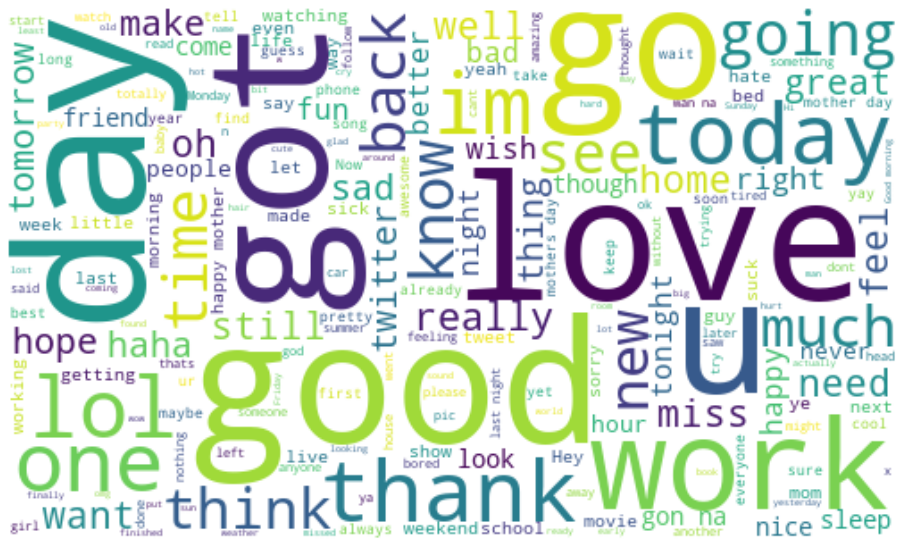

In [13]:
fig, ax = plt.subplots(figsize = (16, 16))

allwords=' '.join(tweets["tokenized text"])

wordcloud=WordCloud(width=500, height=300,random_state=15,max_font_size=100,\
                   background_color = 'white').generate(allwords)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()